In [ ]:
"""
PS2 – Question 3 (a)

This script generates a random graph from the G(n,m) model
with average degree c = 2m/n. It computes the size of the
largest connected component and compares the result with
the theoretical prediction S = 1 - exp(-cS).
"""

import math
import random
from collections import defaultdict


# This function finds the size of the largest connected component
# using a Union-Find (disjoint set) structure.

def find_largest_component(n, edges):
    
    parent = list(range(n))
    rank = [0] * n

    # Find with path compression
    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x

    # Union by rank
    def union(x, y):
        rx, ry = find(x), find(y)
        if rx == ry:
            return
        if rank[rx] < rank[ry]:
            rx, ry = ry, rx
        parent[ry] = rx
        if rank[rx] == rank[ry]:
            rank[rx] += 1

    # Merge components according to edges
    for u, v in edges:
        union(u, v)

    # Count sizes of components
    size = defaultdict(int)
    for i in range(n):
        size[find(i)] += 1

    return max(size.values())


# This function generates a random graph G(n,m)
# by sampling m distinct edges uniformly at random.

def generate_gnm(n, m):
    
    edges = set()
    
    # Keep sampling random pairs until we have m edges
    while len(edges) < m:
        u = random.randrange(n)
        v = random.randrange(n)
        
        if u != v:
            # Store edges in sorted order since graph is undirected
            if u > v:
                u, v = v, u
            edges.add((u, v))
    
    return list(edges)


# Runs one simulation:
# computes m from c and returns largest component fraction

def run_trial(n, c):
    
    # In G(n,m), average degree is c = 2m/n
    m = int(round(c * n / 2))
    
    edges = generate_gnm(n, m)
    
    largest_size = find_largest_component(n, edges)
    
    return largest_size / n


# Solves the theoretical equation S = 1 - exp(-cS)
# using simple fixed-point iteration

def solve_S(c, tol=1e-10):
    
    if c <= 1.0:
        return 0.0

    S = 0.5  # initial guess
    
    for _ in range(10000):
        S_new = 1 - math.exp(-c * S)
        if abs(S_new - S) < tol:
            return S_new
        S = S_new
    
    return S


# Main test block

if __name__ == "__main__":
    
    n = 1_000_000
    c = 2 * math.log(2)
    
    print("Running simulation for n =", n)
    
    sim_fraction = run_trial(n, c)
    theory_fraction = solve_S(c)
    
    print("Simulation fraction:", sim_fraction)
    print("Theory fraction:", theory_fraction)
    print("Difference:", abs(sim_fraction - theory_fraction))

Running simulation for n = 1000000
Simulation fraction: 0.499422
Theory fraction: 0.5
Difference: 0.0005780000000000229


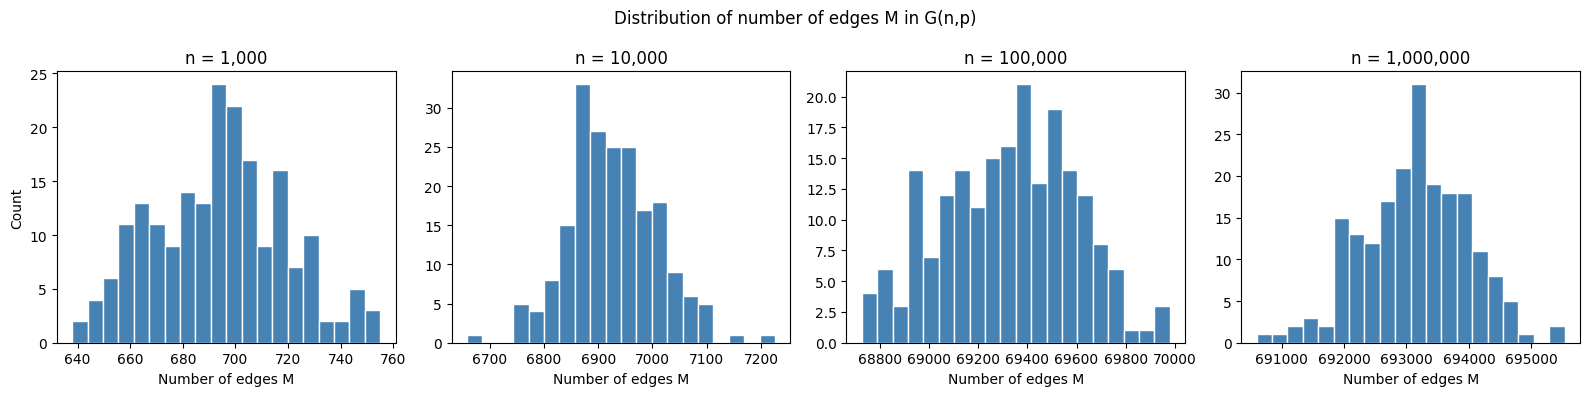

In [1]:
import numpy as np
import matplotlib.pyplot as plt

c = 2 * np.log(2)
n_values = [1000, 10000, 100000, 1000000]
n_trials = 200

fig, axes = plt.subplots(1, len(n_values), figsize=(16,4))

for ax, n in zip(axes, n_values):
    
    p = c / (n - 1)
    N_edges = n*(n-1)//2
    
    # simulate M ~ Binomial(N_edges, p)
    M_samples = np.random.binomial(N_edges, p, size=n_trials)
    
    ax.hist(M_samples, bins=20, color='steelblue', edgecolor='white')
    ax.set_title(f"n = {n:,}")
    ax.set_xlabel("Number of edges M")
    
axes[0].set_ylabel("Count")
plt.suptitle("Distribution of number of edges M in G(n,p)")
plt.tight_layout()
plt.show()